# ML Pragmatic programming in Python

In [1]:
import numpy as np
import pandas as pd

from scipy import stats

import matplotlib
import matplotlib.pyplot as plt
%matplotlib inline 

import IPython
from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity = "all"


## Generate data 

* generate data
* load data sets (toy)

http://scikit-learn.org/stable/datasets/index.html

### Gen random numbers

* uniform
* normal
* multivariate
* bolean
* integer

In [2]:
## random numbers
np.random.seed(seed=2018)

# random boolean
b = np.random.uniform(size=3) > .5
b

# uniform
u = np.random.uniform(size=3)
u

# random int
i = np.random.randint(0,9,size=3)
i

# random choice
c = np.random.choice(['a','b','c','e'],size=7)
c

# normal
n = np.random.normal(size=5)
n

# multivariated normal 2d;
_mean = (1, 2)
_cov = [[1, 0], [0, 1]]
m = np.random.multivariate_normal(_mean, _cov, 3 )
m.shape
m

array([ True, False,  True])

array([0.3063989 , 0.44640887, 0.58998539])

array([6, 6, 1])

array(['e', 'a', 'c', 'c', 'b', 'b', 'c'], dtype='<U1')

array([ 0.510221  , -0.16513097, -1.35177905,  0.54663075,  1.23065512])

(3, 2)

array([[2.0764461 , 0.78937512],
       [0.69332343, 0.94258116],
       [1.40205692, 2.28916512]])

### Gen data for classifications and clustering

Shameless stolen from:
http://scikit-learn.org/stable/auto_examples/datasets/plot_random_dataset.html#sphx-glr-auto-examples-datasets-plot-random-dataset-py


* **make_classification** create multiclass datasets by allocating each class one or more **normally-distributed** clusters of points

   make_classification introducing noise by way of: correlated, redundant and uninformative features; multiple Gaussian clusters per class; and linear transformations of the feature space.

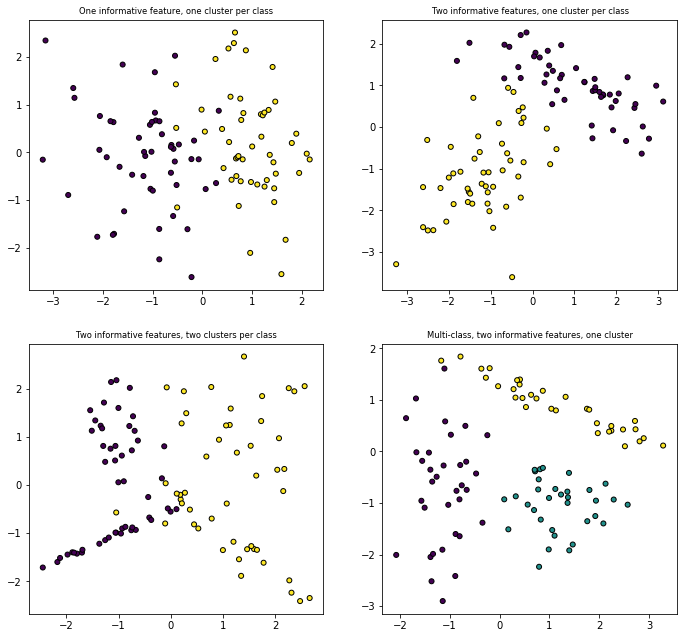

In [3]:
## classification (normal distributed)
from sklearn.datasets import make_classification

plt.figure(figsize=(10, 15));

plt.subplots_adjust(bottom=.05, top=.9, left=.05, right=.95);

X1, Y1 = make_classification(n_features=2, n_redundant=0, n_informative=1,
                             n_clusters_per_class=1)

plt.subplot(321);
plt.title("One informative feature, one cluster per class", fontsize='small');
plt.scatter(X1[:, 0], X1[:, 1], marker='o', c=Y1,
            s=25, edgecolor='k')

X1, Y1 = make_classification(n_features=2, n_redundant=0, n_informative=2,
                             n_clusters_per_class=1)

plt.subplot(322);
plt.title("Two informative features, one cluster per class", fontsize='small');

plt.scatter(X1[:, 0], X1[:, 1], marker='o', c=Y1,
            s=25, edgecolor='k');


X2, Y2 = make_classification(n_features=2, n_redundant=0, n_informative=2)

plt.subplot(323);
plt.title("Two informative features, two clusters per class",
          fontsize='small');

plt.scatter(X2[:, 0], X2[:, 1], marker='o', c=Y2,
            s=25, edgecolor='k')


X1, Y1 = make_classification(n_features=2, n_redundant=0, n_informative=2,
                             n_clusters_per_class=1, n_classes=3)

plt.subplot(324);
plt.title("Multi-class, two informative features, one cluster",
          fontsize='small');

plt.scatter(X1[:, 0], X1[:, 1], marker='o', c=Y1,
            s=25, edgecolor='k');

plt.show();

* **make_blobs**: Generate isotropic (uniformity in all orientations) Gaussian blobs for clustering. 

* **make_gaussian_quantiles**: Generate isotropic Gaussian and label samples by quantile

<Figure size 792x360 with 0 Axes>

Text(0.5,1,'Three blobs')

Text(0.5,1,'Gaussian divided into three quantiles')

(-4, 4)

(-4, 4)

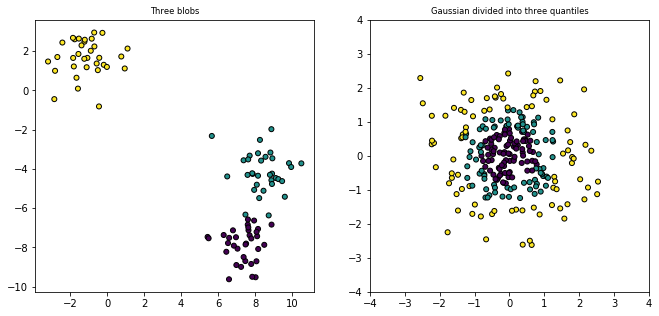

In [4]:
## Blobs n gaussian qunatiles
from sklearn.datasets import make_blobs
from sklearn.datasets import make_gaussian_quantiles

X1, Y1 = make_blobs(n_features=2, centers=3, random_state=2018)

plt.figure(figsize=(11,5));

ax1 = plt.subplot(121);
plt.title("Three blobs", fontsize='small');
plt.scatter(X1[:, 0], X1[:, 1], marker='o', c=Y1,
            s=25, edgecolor='k');

X1, Y1 = make_gaussian_quantiles(n_features=2, n_classes=3,n_samples=256,random_state=2018)

ax2 = plt.subplot(122);
plt.title("Gaussian divided into three quantiles", fontsize='small');

plt.scatter(X1[:, 0], X1[:, 1], marker='o', c=Y1,
            s=25, edgecolor='k');

ax2.set_xlim(-4,4);
ax2.set_ylim(-4,4);

plt.show()

* **make_circles**: Make a large circle containing a smaller circle in 2d.

* **make_moons**: Make two interleaving half circles

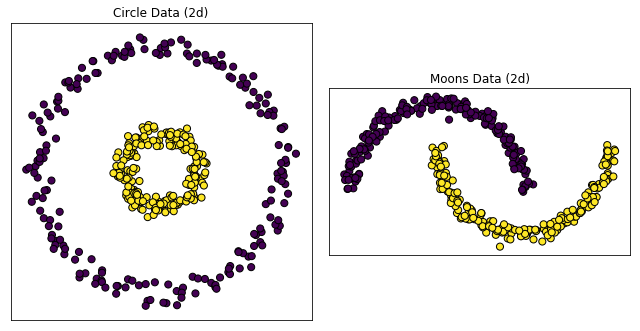

In [5]:
## Clustering
from sklearn.datasets import make_moons, make_circles

X, y = make_circles(n_samples=400, factor=.3, noise=.05, random_state=2018)

# scatter plot of original and reduced data
fig = plt.figure(figsize=(9, 8));

ax1 = plt.subplot(121,aspect='equal');
ax1.scatter(X[:, 0], X[:, 1], c=y, s=50, edgecolor='k');
ax1.set_title("Circle Data (2d)");
ax1.set_xticks(());
ax1.set_yticks(());


X, y = make_moons(n_samples=400, noise=.05,random_state=2018)

ax2 = plt.subplot(122,aspect='equal');
ax2.scatter(X[:, 0], X[:, 1], c=y, s=50, edgecolor='k');
ax2.set_title("Moons Data (2d)");
ax2.set_xticks(());
ax2.set_yticks(());

plt.tight_layout();
plt.show;


### Load data sets


* **load_iris** Load and return the iris dataset (classification).

<img src="images/iris_petal_sepal.png" width="250" align="left"/>


data size: (150, 4)
features: ['sepal length (cm)', 'sepal width (cm)', 'petal length (cm)', 'petal width (cm)']
labels: ['setosa' 'versicolor' 'virginica']



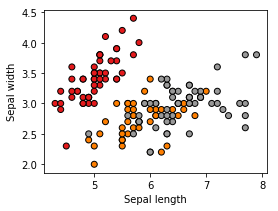

In [6]:
## datasets

from sklearn.datasets import load_iris

# Load the Iris flower dataset:
iris = load_iris()
X_iris = iris.data
Y_iris = iris.target

print('data size: {}'.format(X_iris.shape))
print('features: {}'.format(iris.feature_names))
print('labels: {}'.format(iris.target_names))

print()

plt.figure(2, figsize=(4, 3));
plt.clf();

# Plot 
plt.scatter(X_iris[:, 0], X_iris[:, 1], c=Y_iris, cmap=plt.cm.Set1,
            edgecolor='k');
plt.xlabel('Sepal length');
plt.ylabel('Sepal width');

* **load_boston**: Load and return the boston house-prices dataset (regression).

In [7]:
# Boston house pricing

from sklearn.datasets import load_boston

boston = load_boston()

print('data size: {}'.format(boston.data.shape))
print('features: {}'.format(boston.feature_names))

data size: (506, 13)
features: ['CRIM' 'ZN' 'INDUS' 'CHAS' 'NOX' 'RM' 'AGE' 'DIS' 'RAD' 'TAX' 'PTRATIO'
 'B' 'LSTAT']


## Evaluation metrics

### Accuracy  and confusion matrix

In [8]:
## Accuracy 

from sklearn.metrics import accuracy_score, confusion_matrix
from tabulate import tabulate

np.random.seed(2018)

y_true = np.random.uniform(size=7) > .5
y_pred = np.random.uniform(size=7) > .4

acc = accuracy_score(y_true, y_pred)
print('Fake data')
print('y_true: {}'.format(y_true))
print('y_pred: {}'.format(y_pred))

print('accuracy: {}'.format(acc))

cf_m = confusion_matrix(y_true, y_pred)

cf_df = pd.DataFrame(cf_m, index=["Actual Positive", "Actual Negative"], columns = ["Predicted Positive", "Predicted Negative"])
tn, fp, fn, tp = confusion_matrix(y_true, y_pred).ravel()

FPR = fp/(fp+tn)
FNR = fn/(tp+fn)

print(tabulate(cf_df, tablefmt="orgtbl",
               headers="keys"))


print()
print('FPR: {}'.format(FPR))
print('FNR: {}'.format(FNR))

print()


Fake data
y_true: [ True False  True False False  True  True]
y_pred: [ True  True False  True  True  True False]
accuracy: 0.2857142857142857
|                 |   Predicted Positive |   Predicted Negative |
|-----------------+----------------------+----------------------|
| Actual Positive |                    0 |                    3 |
| Actual Negative |                    2 |                    2 |

FPR: 1.0
FNR: 0.5



=================================

For markdwon cells, insert the code in a markdown cell. 

```python
\{\{print(tabulate(cf_df, headers="keys", tablefmt="html"))\}\}
```


{{print(tabulate(cf_df, headers="keys", tablefmt="html"))}}


### Precision Recall Curve, AUC and F score


####  Downsampling data example

Does need to run one time int he case we do not have data/creditcard_downsampled.csv.tar.bz2.

Also is an example of downsampling data.

Data downloaded from:
https://www.kaggle.com/mlg-ulb/creditcardfraud


* The original imbalance ratio (492:284315): 0.002
* Downsample the majority to reach the ratio 1:3 , just to have small data set

In [9]:
## Does not need to run this again once you have credicard_downsampled.csv.tar.bz2
creditcard_df = pd.read_csv('data/creditcard.csv.zip', compression='zip', sep=',', quotechar='"')

creditcard_df.sample(3).head(3)

n_pos = np.sum(creditcard_df.Class == True)
print('#positives: {}'.format(n_pos))

n_neg = np.sum(creditcard_df.Class == False)
print('#negatives: {}'.format(n_neg))

r = n_pos/(n_pos + n_neg)
print('Imbalance data ratio ({0}:{1}): {2:.3f}'.format(n_pos,n_neg,r))

,Time,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
284712,172704.0,0.470194,-1.619056,-2.258427,4.440719,0.202024,-0.458243,1.970565,-0.665303,-1.630737,...,0.603016,0.104952,-0.716836,0.121688,0.170587,0.082567,-0.218942,0.070955,787.95,0
108183,70800.0,-0.336279,0.237895,1.158456,-0.636549,-0.311637,-0.927103,0.216604,-0.403082,-0.869822,...,0.000923,0.143971,-0.129530,0.318251,-0.541146,-0.357414,-0.229982,-0.030124,24.20,0
29691,35588.0,-0.661606,1.170678,1.237694,-0.188206,0.164123,-0.605819,0.765953,-0.072226,-0.269068,...,-0.286087,-0.657133,-0.070964,-0.117952,-0.051093,0.105311,0.386870,0.175486,21.98,0


#positives: 492
#negatives: 284315
Imbalance data ratio (492:284315): 0.002


downsample both class to have smaller dataset

In [10]:
from sklearn.utils import resample

# Separate majority and minority classes
df_majority = creditcard_df[creditcard_df.Class==0]
df_minority = creditcard_df[creditcard_df.Class==1]
 
# Downsample majority class
df_majority_downsampled = resample(df_majority, 
                                 replace=False,    # sample without replacement
                                 n_samples=2000,     # to match minority class
                                 random_state=123) # reproducible results
 

# Combine minority class with downsampled majority class
df_downsampled = pd.concat([df_majority_downsampled, df_minority])
df_downsampled = df_downsampled.reset_index(drop=True)


# Saving
df_downsampled.to_csv('data/creditcard_downsampled.csv', index=False)

In [11]:
%%bash

# remove old file
rm -v data/creditcard_downsampled.csv.tar.bz2 
tar -cjvf  data/creditcard_downsampled.csv.tar.bz2 data/creditcard_downsampled.csv

rm -v data/creditcard_downsampled.csv

du -sh data/*

removed 'data/creditcard_downsampled.csv.tar.bz2'
data/creditcard_downsampled.csv
removed 'data/creditcard_downsampled.csv'
66M	data/creditcard.csv.zip
544K	data/creditcard_downsampled.csv.tar.bz2


#### Load downsampled data

In [12]:
## Does not need to run this again once you have credicard_downsampled.csv.tar.bz2
creditcard_df = pd.read_csv('data/creditcard_downsampled.csv.tar.bz2', compression='bz2', 
                            sep=',', quotechar='"', index_col=False)

creditcard_df = creditcard_df.dropna()
creditcard_df[['Class','Amount']].describe()

creditcard_df['Class'] = creditcard_df.Class.astype(int)

creditcard_df.sample(3).head(3)

n_pos = np.sum(creditcard_df.Class == True)
print('#positives: {}'.format(n_pos))

n_neg = np.sum(creditcard_df.Class == False)
print('#negatives: {}'.format(n_neg))

r = n_pos/(n_pos + n_neg)
print('Imbalance data ratio ({0}:{1}): {2:.3f}'.format(n_pos,n_neg,r))

,Class,Amount
count,2492.000000,2492.000000
mean,0.197432,97.498427
std,0.398141,224.284179
min,0.000000,0.000000
25%,0.000000,3.597500
50%,0.000000,21.030000
75%,0.000000,89.990000
max,1.000000,3249.730000


,data/creditcard_downsampled.csv,V1,V2,V3,V4,V5,V6,V7,V8,V9,...,V21,V22,V23,V24,V25,V26,V27,V28,Amount,Class
321,122241.0,-0.170614,1.274014,2.236537,4.467599,-0.039297,0.711163,0.100481,0.243372,-1.596784,...,-0.123947,-0.384079,0.078550,-0.036550,-0.804647,0.077865,0.192769,0.175780,15.17,0
500,62263.0,-0.742894,0.787240,1.904695,1.064987,0.027265,0.389513,0.744168,0.235986,-0.740287,...,0.045461,0.175320,-0.191189,0.227292,0.434215,-0.208920,0.071592,0.064520,59.95,0
682,136093.0,-0.877106,1.999401,-3.522441,-1.323421,1.234826,-0.807607,0.705130,0.846215,-0.864392,...,0.580456,1.639720,-0.060483,-0.229421,-0.795074,0.118283,0.122198,0.231562,6.00,0


#positives: 492
#negatives: 2000
Imbalance data ratio (492:2000): 0.197


#### Training 2 models

In [13]:
from sklearn.model_selection import train_test_split

X = creditcard_df[creditcard_df.columns[:-1]]
y = creditcard_df[creditcard_df.columns[-1]]

X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=2018, test_size=0.3)


In [14]:
# random forests
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression

rf = RandomForestClassifier(n_estimators = 15,max_depth=5,
                            random_state=0).fit(X_train, y_train)


lr = LogisticRegression().fit(X_train, y_train)


#### Precision n Recall Curves

Imbalance data ratio (492:2000): 0.197


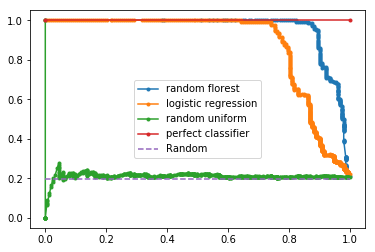

In [15]:
from sklearn.metrics import precision_recall_curve


y_true = y_test > 0.5
y_score_rf = rf.predict_proba(X_test)[:,-1]
y_score_lr = lr.predict_proba(X_test)[:,-1]
np.random.seed(2018)
y_score_rd = np.random.uniform(size=y_test.shape[0])
y_score_perfect = y_test

r = n_pos/(n_pos + n_neg)
print('Imbalance data ratio ({0}:{1}): {2:.3f}'.format(n_pos,n_neg,r))

precision1, recall1, thrs1 = precision_recall_curve(y_true, y_score_rf)

precision2, recall2, thrs2 = precision_recall_curve(y_true, y_score_lr)

precision3, recall3, thrs3 = precision_recall_curve(y_true, y_score_rd)

precision4, recall4, thrs4 = precision_recall_curve(y_true, y_score_perfect)


plt.plot(recall1, precision1, marker='.',label='random florest');
plt.plot(recall2, precision2, marker='.', label='logistic regression');
plt.plot(recall3, precision3, marker='.', label='random uniform');
plt.plot(recall4, precision4, marker='.', label='perfect classifier');
plt.plot([0, 1], [r, r], linestyle='--',label='Random');
plt.legend();
                                              

AUCPRC: 0.9584156721781121
f1 score: 0.9665775401069518


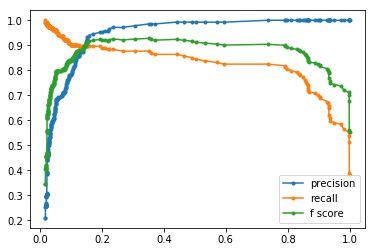

In [16]:
from sklearn.metrics import f1_score, auc

area = auc(recall1, precision1)

f = f1_score(y_true, y_score_rf > 0.5 , average='micro')

print('AUCPRC: {}'.format(area))
print('f1 score: {}'.format(f))


# precision_recall_curve returns precision  and recall as a array od shape = [n_thresholds + 1] 
thrs1.shape
recall1.shape
precision1.shape

precision = precision1[:-1]
recall = recall1[:-1]

precision.shape
recall.shape

f_scores = 2 * (precision * recall) / (precision + recall)

plt.plot(thrs1, precision, marker='.',label='precision');
plt.plot(thrs1, recall, marker='.', label='recall');
plt.plot(thrs1, f_scores, marker='.', label='f score');
plt.legend();